### Steps for Data Science Project:
###    1. Import the data
###    2. Clean the data
###    3. Split data. Training Set/Test Set - if applicable
###    4. Create a Model
###    5. Check the output 
###    6. Improve

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [9]:
df = pd.read_csv("twitter_data.csv")
df.head()

,tweet_id,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,0,Lee Badgley,2022-12-11 16:07:23+00:00,0,Twitter for iPhone,@ZenTeague @knothand1 @TimRunsHisMouth @POTUS ...
1,1,Debbie,2022-12-11 16:07:17+00:00,0,Twitter for iPhone,@FoxNews There is no limit to Biden &amp; his ...
2,2,Giveback Ourchoice,2022-12-11 16:07:15+00:00,0,Twitter for Android,Why aren't the Republicans throwing a fit abou...
3,3,HandsomeBully,2022-12-11 16:07:15+00:00,0,Twitter for Android,@RSic90896766 @DaperReptilian @ken2lil @Awilix...
4,4,Steve Palmo,2022-12-11 16:07:09+00:00,0,Twitter for iPhone,Court Permanently Blocks Biden Administration’...


In [10]:
df.shape

(95, 6)

In [11]:
df.describe()

,tweet_id,Number of Likes
count,95.000000,95.000000
mean,47.000000,0.042105
std,27.568098,0.249074
min,0.000000,0.000000
25%,23.500000,0.000000
50%,47.000000,0.000000
75%,70.500000,0.000000
max,94.000000,2.000000


In [12]:
df.values

array([[0, 'Lee Badgley', '2022-12-11 16:07:23+00:00', 0,
        'Twitter for iPhone',
        '@ZenTeague @knothand1 @TimRunsHisMouth @POTUS Don’t use facts, especially when it points to the Obama/Biden administration.'],
       [1, 'Debbie', '2022-12-11 16:07:17+00:00', 0,
        'Twitter for iPhone',
        '@FoxNews There is no limit to Biden &amp; his Administration’s COLLUSION with the enemy.  🤬'],
       [2, 'Giveback Ourchoice', '2022-12-11 16:07:15+00:00', 0,
        'Twitter for Android',
        "Why aren't the Republicans throwing a fit about the fact Trump did NOTHING to help Whelan?!🤔\nThe twin brother of Pa… https://t.co/yfQrITcP6A"],
       [3, 'HandsomeBully', '2022-12-11 16:07:15+00:00', 0,
        'Twitter for Android',
        '@RSic90896766 @DaperReptilian @ken2lil @Awilix__ @RogerJStoneJr "censoring" naked pictures of Hunter biden\'s penis?… https://t.co/qDNYqfa6eb'],
       [4, 'Steve Palmo', '2022-12-11 16:07:09+00:00', 0,
        'Twitter for iPhone',
      

### Checking for Null values

In [13]:
df.isnull()

,tweet_id,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
90,False,False,False,False,False,False
91,False,False,False,False,False,False
92,False,False,False,False,False,False
93,False,False,False,False,False,False


In [14]:
# Removing special characters from "Tweet" column 
df["Tweet"] = df["Tweet"].str.replace('@', '', regex=True)
df.head()

,tweet_id,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,0,Lee Badgley,2022-12-11 16:07:23+00:00,0,Twitter for iPhone,ZenTeague knothand1 TimRunsHisMouth POTUS Don’...
1,1,Debbie,2022-12-11 16:07:17+00:00,0,Twitter for iPhone,FoxNews There is no limit to Biden &amp; his A...
2,2,Giveback Ourchoice,2022-12-11 16:07:15+00:00,0,Twitter for Android,Why aren't the Republicans throwing a fit abou...
3,3,HandsomeBully,2022-12-11 16:07:15+00:00,0,Twitter for Android,RSic90896766 DaperReptilian ken2lil Awilix__ R...
4,4,Steve Palmo,2022-12-11 16:07:09+00:00,0,Twitter for iPhone,Court Permanently Blocks Biden Administration’...


In [15]:
#Clean text more
import re
# Function to clean our tweets

def clean_tweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @mentions
    text = re.sub(r'#', '', text) # removing the # symbol
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyper link
    
    return text
    

In [16]:
# Cleaned Text
df["Tweet"] = df["Tweet"].apply(clean_tweet)

# Show the cleaned text
df["Tweet"]

0     ZenTeague knothand1 TimRunsHisMouth POTUS Don’...
1     FoxNews There is no limit to Biden &amp; his A...
2     Why aren't the Republicans throwing a fit abou...
3     RSic90896766 DaperReptilian ken2lil Awilix__ R...
4     Court Permanently Blocks Biden Administration’...
                            ...                        
90    JacobWindrix: DonaldJTrumpJr Trump turned down...
91    HeyTammyBruce: Federal appeals court bars Bide...
92    WhiteHouse: On the 81st anniversary of Pearl H...
93    Lockerbie bombing suspect in US custody - Grea...
94    Out5p0ken: Former National Security Adviser Jo...
Name: Tweet, Length: 95, dtype: object

### There isn't much data cleaning needed for our dataset, only problems seem to be small dataset and many special characters. Since we are mainly focusing on a text mining ML model, we will only be focusing on the text of each tweet.

In [17]:
x1 = [device for device in df["Source of Tweet"] if "Twitter for iPhone" in device]
x2 = [device for device in df["Source of Tweet"] if "Twitter for Android" in device]


In [18]:
iphone_user = (len(x1))
android_user = (len(x2))

print(iphone_user, android_user)

36 35


iphones have one more total tweets than androids, basically even on which device tweets the most


### Creating our model for sentiment analysis:

In [21]:
# Create a function to get the subjectivity - tells how subjective/opinionated the text is

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
    
# Create a function to get polarity --> Tells how positive or negative the text is
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df["Tweet"].apply(get_subjectivity)
df['Polarity'] = df["Tweet"].apply(get_polarity)


# Show new df with new columns
df

,tweet_id,User,Date Created,Number of Likes,Source of Tweet,Tweet,Subjectivity,Polarity
0,0,Lee Badgley,2022-12-11 16:07:23+00:00,0,Twitter for iPhone,ZenTeague knothand1 TimRunsHisMouth POTUS Don’...,1.000000,0.000000
1,1,Debbie,2022-12-11 16:07:17+00:00,0,Twitter for iPhone,FoxNews There is no limit to Biden &amp; his A...,0.000000,0.000000
2,2,Giveback Ourchoice,2022-12-11 16:07:15+00:00,0,Twitter for Android,Why aren't the Republicans throwing a fit abou...,0.400000,0.400000
3,3,HandsomeBully,2022-12-11 16:07:15+00:00,0,Twitter for Android,RSic90896766 DaperReptilian ken2lil Awilix__ R...,0.400000,0.000000
4,4,Steve Palmo,2022-12-11 16:07:09+00:00,0,Twitter for iPhone,Court Permanently Blocks Biden Administration’...,0.000000,0.000000
...,...,...,...,...,...,...,...,...
90,90,Joe,2022-12-11 16:02:41+00:00,0,Twitter for iPad,JacobWindrix: DonaldJTrumpJr Trump turned down...,0.594444,-0.377778
91,91,Brian Childers,2022-12-11 16:02:40+00:00,0,Twitter for iPhone,HeyTammyBruce: Federal appeals court bars Bide...,0.100000,0.000000
92,92,Michael Russell,2022-12-11 16:02:38+00:00,0,Twitter for Android,WhiteHouse: On the 81st anniversary of Pearl H...,1.000000,1.000000
93,93,BJW,2022-12-11 16:02:36+00:00,0,Twitter for iPhone,Lockerbie bombing suspect in US custody - Grea...,0.750000,0.800000


### Text cloud visualization using Word Cloud - words seen the most is our tweets

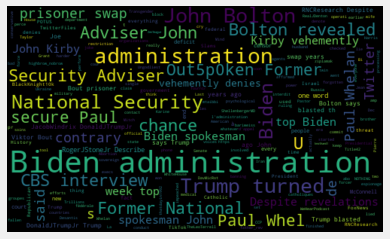

In [23]:
# plot word cloud
all_words = ' '.join( [tweets for tweets in df["Tweet"]] )
word_cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.style.use("fivethirtyeight")

plt.imshow(word_cloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [24]:
# Create function to compute negative, neutral, and positive analysis

def get_analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Postive"

df['Analysis'] = df['Polarity'].apply(get_analysis)

# Show the df
df

,tweet_id,User,Date Created,Number of Likes,Source of Tweet,Tweet,Subjectivity,Polarity,Analysis
0,0,Lee Badgley,2022-12-11 16:07:23+00:00,0,Twitter for iPhone,ZenTeague knothand1 TimRunsHisMouth POTUS Don’...,1.000000,0.000000,Neutral
1,1,Debbie,2022-12-11 16:07:17+00:00,0,Twitter for iPhone,FoxNews There is no limit to Biden &amp; his A...,0.000000,0.000000,Neutral
2,2,Giveback Ourchoice,2022-12-11 16:07:15+00:00,0,Twitter for Android,Why aren't the Republicans throwing a fit abou...,0.400000,0.400000,Postive
3,3,HandsomeBully,2022-12-11 16:07:15+00:00,0,Twitter for Android,RSic90896766 DaperReptilian ken2lil Awilix__ R...,0.400000,0.000000,Neutral
4,4,Steve Palmo,2022-12-11 16:07:09+00:00,0,Twitter for iPhone,Court Permanently Blocks Biden Administration’...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...
90,90,Joe,2022-12-11 16:02:41+00:00,0,Twitter for iPad,JacobWindrix: DonaldJTrumpJr Trump turned down...,0.594444,-0.377778,Negative
91,91,Brian Childers,2022-12-11 16:02:40+00:00,0,Twitter for iPhone,HeyTammyBruce: Federal appeals court bars Bide...,0.100000,0.000000,Neutral
92,92,Michael Russell,2022-12-11 16:02:38+00:00,0,Twitter for Android,WhiteHouse: On the 81st anniversary of Pearl H...,1.000000,1.000000,Postive
93,93,BJW,2022-12-11 16:02:36+00:00,0,Twitter for iPhone,Lockerbie bombing suspect in US custody - Grea...,0.750000,0.800000,Postive


### Printing all the positive tweets

In [25]:
j = 1 

sorted_df = df.sort_values(by="Polarity")

for i in range(0, sorted_df.shape[0]):
    if (sorted_df["Analysis"][i] == "Postive"):
        print(str(j) + ')'+ sorted_df["Tweet"][i])
        print()
        j += 1

1)Why aren't the Republicans throwing a fit about the fact Trump did NOTHING to help Whelan?!🤔
The twin brother of Pa… 

2)mtaibbi: ShellenbergerMD bariweiss 6.     As soon as they finished banning Trump, Twitter execs started processing new power. They pr…

3)RNCResearch: Despite revelations to the contrary this week, top Biden spokesman John Kirby vehemently denies the Biden administration a…

4)Out5p0ken: Former National Security Adviser John Bolton revealed in a CBS interview that Trump turned down a chance to secure Paul Whel…

5)Despite revelations to the contrary this week, top Biden spokesman John Kirby vehemently denies the Biden administr… 

6)elonmusk murraymints82 You have officially lost your Mind, this is not about free speech you are on e personal Ve… 

7)Out5p0ken: Former National Security Adviser John Bolton revealed in a CBS interview that Trump turned down a chance to secure Paul Whel…

8)RNCResearch: Despite revelations to the contrary this week, top Biden spokesman

### Print the Negative Tweets



In [26]:
j = 1

sorted_df_two = df.sort_values(by=["Polarity"], ascending = False)
for i in range(0, sorted_df_two.shape[0]):
    if(sorted_df_two["Analysis"][i] == "Negative"):
        print(str(j) + ')' + sorted_df_two["Tweet"][i])
        print()
        j += 1

        

1)JimRapoli: Ex Trump administration member Miles Taylor just blew the roof off Republicans crazy claims of Twitter files 
Mr Taylor was…

2)JudicialWatch: The Taliban is training and operating with U.S. military equipment including rifles, trucks, and helmets with night visi…

3)The Biden administration is becoming the Evil Empire! This is inexcusable! 

4)JacobWindrix: DonaldJTrumpJr Trump turned down Paul Whelan and Viktor Bout prisoner swap years ago, John Bolton says

Trump blasted th…

5)highbrow_nobrow: Under the Trump Administration, the deficit went up every single year. Under President Biden, the deficit has fallen s…

6)highbrow_nobrow: Under the Trump Administration, the deficit went up every single year. Under President Biden, the deficit has fallen s…

7)FoxNews Biden Administration is a bad joke and national nightmare!

8)JacobWindrix: DonaldJTrumpJr Trump turned down Paul Whelan and Viktor Bout prisoner swap years ago, John Bolton says

Trump blasted th…

9)thatdayin199

### Plot the polarity and subjectivity

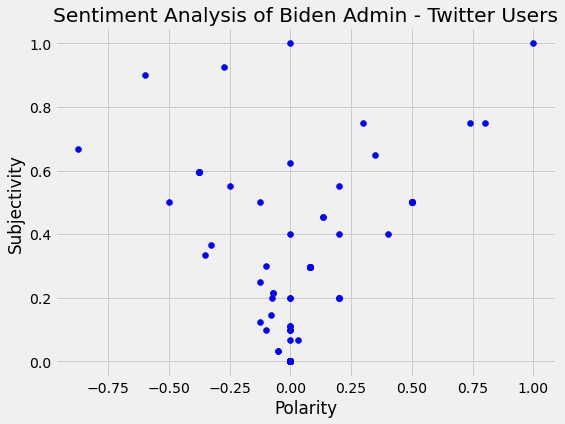

In [27]:
plt.figure(figsize = (8, 6))
for i in range(0, df.shape[0]):#df.shape is the number of rows
    plt.scatter(df['Polarity'][i], df["Subjectivity"][i], color = 'Blue') # df[Polarity] x axis, subjectivity is y axis, for our scatter plot
    
plt.title("Sentiment Analysis of Biden Admin - Twitter Users")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()


Fair distribution of both Positive and Negative sentiment regarding the Biden Admin around midterms -- Mostly neutral. 

-We can see that the positive and negative tweets are high on subjectivity (more opinionated) and those that are neutral are lower on subjectivity. That is an accurate representation of the political party climate currently. Independents are neutral and low on subjectivity, whilst Dems and Repubs are highly subjective and lean either positive or negative depending on the political candidate/party in charge.

### Percentage of Positive Tweets

In [29]:
ptweets = df[df.Analysis == 'Postive']
ptweets = ptweets['Tweet']

pos_percent = round((ptweets.shape[0] / df.shape[0])*100,1)

pos_percent

31.6

### Percentage of Negative Tweets

In [31]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets["Tweet"]

negative_percent = round((ntweets.shape[0] / df.shape[0])*100,1)

negative_percent

24.2

### Percentage of Neutral Tweets

In [32]:
neutral_tweets = df[df.Analysis == 'Neutral']
neutral_tweets = neutral_tweets["Tweet"]

neutral_percent = round((neutral_tweets.shape[0] / df.shape[0])*100,1)

neutral_percent

44.2

### Show the value counts

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Sentiment', ylabel='Counts'>

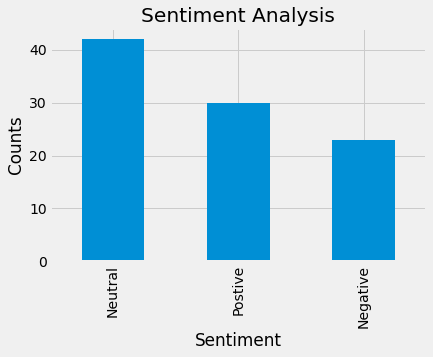

In [38]:
df["Analysis"].value_counts()

# plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')



        


# Conclusion

44% of twitter users had a neutral sentiment of the Biden Administration during the 2022 Midterm Election,

31% of twitter users had a positive sentiment of the Biden Administration during the 2022 Midterm Election,

and 24% of twitter users had a negative sentiment of the Biden Administration during the 2022 Midterm Election

After election results, we can see this is somewhat in line with current political climate, the Democratic party performed better then anticipated.

